In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
files = [file for file in os.listdir(r"C:\Users\kadir\Downloads\Sales Analysis")]
for file in files:
    print(file)

202001.csv
202002.csv
202003.csv
202004.csv
202005.csv
202006.csv
202007.csv
202008.csv
202009.csv
202010.csv
202011.csv
202012.csv
202101.csv
202102.csv
202103.csv
202104.csv
202105.csv
202106.csv
202107.csv
202108.csv
202109.csv
202110.csv
202111.csv
202112.csv
202201.csv
202202.csv
202203.csv
202204.csv
202205.csv
202206.csv
202207.csv
202208.csv
202209.csv
202210.csv
202211.csv
202212.csv


In [3]:
path = r"C:\Users\kadir\Downloads\Sales Analysis"
all_data = []  # Create an empty list to store the DataFrames
for file in files:
    current_df = pd.read_csv(path + "/" + file)
    all_data.append(current_df)  # Append each DataFrame to the list

combined_data = pd.concat(all_data)  # Concatenate all the DataFrames in the list
combined_data.shape

(37289, 9)

## Data Cleaning

In [4]:
# Check for duplicates
duplicates = combined_data.duplicated()

# Display the DataFrame with a new column indicating duplicates
combined_data['IsDuplicate'] = duplicates

# Display the DataFrame
print(combined_data)

                     Order ID  Order Date   Ship Date       Ship Mode  \
0     MX-2013-BD1172539-41275   1/01/2020   3/01/2020     First Class   
1     US-2013-KC1667555-41275   1/01/2020   5/01/2020  Standard Class   
2     US-2013-KC1667555-41275   1/01/2020   5/01/2020  Standard Class   
3     US-2013-KC1667555-41275   1/01/2020   5/01/2020  Standard Class   
4     MX-2013-PO1886582-41275   1/01/2020   5/01/2020  Standard Class   
...                       ...         ...         ...             ...   
1599   EG-2015-GM444038-42368  30/12/2022  30/12/2022        Same Day   
1600   EG-2015-GM444038-42368  30/12/2022  30/12/2022        Same Day   
1601  MX-2015-RB1946593-42369  31/12/2022  31/12/2022        Same Day   
1602  MX-2015-RB1946593-42369  31/12/2022  31/12/2022        Same Day   
1603  MX-2015-RB1946593-42369  31/12/2022  31/12/2022        Same Day   

          Segment  Market         Category    Sales Order Priority  \
0        Consumer   LATAM  Office Supplies   417.34  

In [5]:
rows_with_missing = combined_data[combined_data.isnull().any(axis=1)]
print(rows_with_missing)

Empty DataFrame
Columns: [Order ID, Order Date, Ship Date, Ship Mode, Segment, Market, Category, Sales, Order Priority, IsDuplicate]
Index: []


In [6]:
missing_columns = combined_data.isnull().sum()
print(missing_columns)

Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Segment           0
Market            0
Category          0
Sales             0
Order Priority    0
IsDuplicate       0
dtype: int64


In [7]:
combined_data.dtypes

Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Segment           object
Market            object
Category          object
Sales             object
Order Priority    object
IsDuplicate         bool
dtype: object

In [8]:
combined_data['Sales'].unique()


array([417.34, 13.608, 102.624, ..., '$1,534.87', '$400.95', '$120.24'],
      dtype=object)

In [9]:
# Remove dollar signs and commas, then convert to float
combined_data['Sales'] = combined_data['Sales'].replace({'\$': '', ',': ''}, regex=True).astype(float)


In [10]:
print(combined_data)

                     Order ID  Order Date   Ship Date       Ship Mode  \
0     MX-2013-BD1172539-41275   1/01/2020   3/01/2020     First Class   
1     US-2013-KC1667555-41275   1/01/2020   5/01/2020  Standard Class   
2     US-2013-KC1667555-41275   1/01/2020   5/01/2020  Standard Class   
3     US-2013-KC1667555-41275   1/01/2020   5/01/2020  Standard Class   
4     MX-2013-PO1886582-41275   1/01/2020   5/01/2020  Standard Class   
...                       ...         ...         ...             ...   
1599   EG-2015-GM444038-42368  30/12/2022  30/12/2022        Same Day   
1600   EG-2015-GM444038-42368  30/12/2022  30/12/2022        Same Day   
1601  MX-2015-RB1946593-42369  31/12/2022  31/12/2022        Same Day   
1602  MX-2015-RB1946593-42369  31/12/2022  31/12/2022        Same Day   
1603  MX-2015-RB1946593-42369  31/12/2022  31/12/2022        Same Day   

          Segment  Market         Category    Sales Order Priority  \
0        Consumer   LATAM  Office Supplies  417.340  

##  Analysis

In [11]:
# Which regions have the highest sales?
highest_sales_regions = combined_data.groupby('Market')['Sales'].sum().nlargest(1)
print("Regions with the highest sales:")
print(highest_sales_regions)

Regions with the highest sales:
Market
Europe    2728601.036
Name: Sales, dtype: float64


In [12]:
# Which regions have the lowest sales?
regions_lowest_sales = combined_data.groupby('Market')['Sales'].sum().nsmallest(1)
print("\nRegions with the lowest sales:")
print(regions_lowest_sales)



Regions with the lowest sales:
Market
Africa    652921.995
Name: Sales, dtype: float64


In [13]:
# Which product category had the highest sales across all regions?
category_highest_sales = combined_data.groupby('Category')['Sales'].sum().idxmax()
print(f"\nProduct category with the highest sales across all regions: {category_highest_sales}")



Product category with the highest sales across all regions: Technology


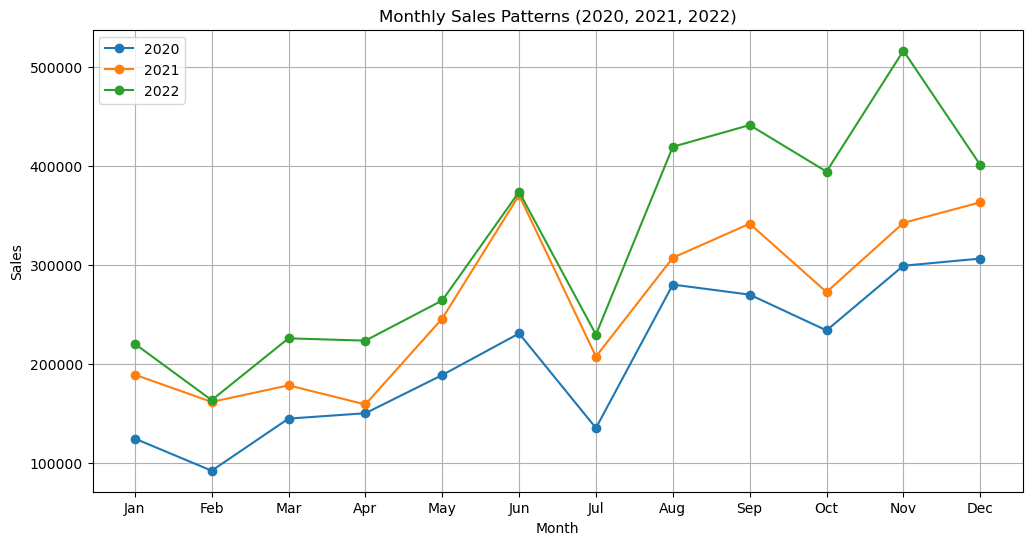

In [14]:
# Convert the 'Order Date' column to datetime format
combined_data['Order Date'] = pd.to_datetime(combined_data['Order Date'], format='%d/%m/%Y')

# Filter data for each year
combined_data_2020 = combined_data[combined_data['Order Date'].dt.year == 2020]
combined_data_2021 = combined_data[combined_data['Order Date'].dt.year == 2021]
combined_data_2022 = combined_data[combined_data['Order Date'].dt.year == 2022]

# Calculate monthly sales for each year
monthly_sales_2020 = combined_data_2020.groupby(combined_data_2020['Order Date'].dt.month)['Sales'].sum()
monthly_sales_2021 = combined_data_2021.groupby(combined_data_2021['Order Date'].dt.month)['Sales'].sum()
monthly_sales_2022 = combined_data_2022.groupby(combined_data_2022['Order Date'].dt.month)['Sales'].sum()

# Plotting the monthly sales for each year
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales_2020.index, monthly_sales_2020.values, label='2020', marker='o')
plt.plot(monthly_sales_2021.index, monthly_sales_2021.values, label='2021', marker='o')
plt.plot(monthly_sales_2022.index, monthly_sales_2022.values, label='2022', marker='o')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Monthly Sales Patterns (2020, 2021, 2022)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(True)
plt.show()

In [15]:
# How is the sales distribution among different customer segments?
segment_sales_distribution = combined_data.groupby('Segment')['Sales'].sum()
print("\nSales distribution among different customer segments:")
print(segment_sales_distribution)


Sales distribution among different customer segments:
Segment
Consumer       4.854143e+06
Corporate      2.369151e+06
Home Office    2.253719e+06
Name: Sales, dtype: float64


In [16]:
# What is the distribution of order priorities and their corresponding sales percentages?
order_priority_distribution = combined_data.groupby('Order Priority')['Sales'].sum()
total_sales = combined_data['Sales'].sum()
order_priority_sales_percent = (order_priority_distribution / total_sales) * 100
print("\nDistribution of order priorities and their corresponding sales percentages:")
print(order_priority_sales_percent)


Distribution of order priorities and their corresponding sales percentages:
Order Priority
Critical     7.474506
High        30.072147
Low          4.422458
Medium      58.030890
Name: Sales, dtype: float64


In [17]:
# Which shipping mode is mostly used and what percentage of total sales does it account for?
shipping_mode_total_sales = combined_data.groupby('Ship Mode')['Sales'].sum()
total_sales = combined_data['Sales'].sum()
shipping_mode_sales_percent = (shipping_mode_total_sales / total_sales) * 100
print("\nSales percentage for each shipping mode:")
print(shipping_mode_sales_percent)


Sales percentage for each shipping mode:
Ship Mode
First Class       14.446719
Same Day           5.228914
Second Class      20.544306
Standard Class    59.780060
Name: Sales, dtype: float64
